 🎓 Student Life Data Analysis & Prediction 
### 🔧 Libraries Used:
- *pandas*: For data manipulation and analysis
- *numpy*: For numerical operations
- *matplotlib / seaborn*: For data visualization (univariate & bivariate)
- *sklearn*: For ML model training (SVM), splitting, and accuracy
- *pickle*: For saving trained model
  

🔶 1. import pandas as pd

📌 Purpose:

To handle structured data — especially tabular datasets (like CSV files) using DataFrames.

✅ Common Use:

Load data: pd.read_csv()

Explore data: df.head(), df.describe(), df.info()

Clean, transform, or manipulate data


🔶 2. import numpy as np

📌 Purpose:

Supports numerical computing. Useful for arrays, mathematical functions, and random data generation.

✅ Common Use:

Handling numeric operations and missing data

Creating arrays: np.array()

Replacing nulls: np.nan

🔶 3. import matplotlib.pyplot as plt

📌 Purpose:

For creating static, animated, or interactive visualizations (like line charts, bar charts, etc.).

✅ Common Use:

Plotting graphs

Visualizing trends and data patterns

🔶 4. import seaborn as sns

📌 Purpose:

A high-level visualization library built on top of matplotlib, especially good for statistical graphics.

✅ Common Use:

Heatmaps, boxplots, pairplots

Data distribution visualizations


🔶 5. from sklearn.model_selection import train_test_split

📌 Purpose:

To split your dataset into training and testing sets for model evaluation.

✅ Common Use:

Training ML models with part of the data

Testing accuracy on unseen data

🔶 6. from sklearn.svm import SVC

📌 Purpose:

To use the Support Vector Classifier — a powerful ML algorithm for classification problems.

✅ Common Use:

Binary or multi-class classification


🔶 7. from sklearn import datasets

📌 Purpose:

Provides sample datasets like iris, digits, etc., for learning and testing models.

✅ Common Use:

Learning and experimentation

🔶 8. from sklearn.metrics import accuracy_score

📌 Purpose:

To measure model accuracy by comparing predicted vs. actual labels.

✅ Common Use:

Model evaluation


🔶 9. import pickle

📌 Purpose:

To save and load Python objects, like trained machine learning models.

✅ Common Use:

Save models for later use

Load saved models without retraining


🔶 10. from sklearn.preprocessing import LabelEncoder

📌 Purpose:

To convert categorical labels into numeric format (like "Male", "Female" → 0, 1).

✅ Common Use:

Preparing data for ML algorithms



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# **Data Loading Class**

In [21]:
#Class for loading and inspecting data

class Data_Handler:
    
  #This class handles loading and basic inspection of the student_life dataset.
  
    def __init__(self, file_path):
        """
        Constructor to initialize the dataset path and load the data.
        :param file_path: Path to the CSV file
        """
        self.file_path = file_path
        self.df = pd.read_csv(file_path)
        
    def data_load(self):
        self.df = pd.read_csv(self.file_path)
        print(f"Data loaded successfully from {self.file_path}")
        return self.df
    def set_display_options(self):
        pd.set_option("display.max_columns", None)
        pd.set_option("display.width", 1000)
    
    def encode_categorical(self):
        le = LabelEncoder()
        for col in self.df.select_dtypes(include='object').columns:
            self.df[col] = le.fit_transform(self.df[col])
        return self.df

    def rename_columns(self, rename_dict):
        """
        Renames columns based on a dictionary.
        :param rename_dict: Dictionary with format {"old_name": "new_name"}
        """
        self.df.rename(columns=rename_dict, inplace=True)
        print("\nColumns renamed!\n")
        return self.df
    

    def get_clean_data(self):
        return self.df

    
    def shape(self):
                #Returns the  sahpe of the dataset."""
        print("\nShape Function\n")
        return self.df.shape
    
    def head(self):
        #Returns the first 5 rows of the dataset."""
        print("\nHead Function\n")
        return self.df.head(3)

    def tail(self):
        #Returns the last 5 rows of the dataset."""
         print("\nTail Function\n")
         return self.df.tail()

    def info(self):
        #Prints info about the dataset.
         print("\nInfo Function\n")
         return self.df.info()

    def describe(self):
        #Returns summary statistics of the dataset.
        print("\n Describe Function\n")
        return self.df.describe()
    def sample(self, n=5):
        """Returns random sample of rows."""
        print("\nSample Function\n")
        return self.df.sample(n)
    
    def get_features_and_target(self, target_column):
     """Splits the dataframe into features (X) and target (y).
     :param target_column: Column to use as the target.
     :return: Tuple of (X, y)"""
    
     X = self.df.drop(target_column, axis=1)
     y = self.df[target_column]
     return X, y

    def get_dataframe(self):
        #Returns the full dataframe for further processing.
        return self.df
		
# Create object and test it
data = Data_Handler("student_lifestyle_dataset.csv")
data.data_load()
data.set_display_options()
print("Before Rename Columns:\n")
print(data.get_clean_data().columns.tolist())
rename_map = {
   
'Student_ID': "STD_ID", 
'Study_Hours_Per_Day': "Study_Hours", 
'Extracurricular_Hours_Per_Day': "Extra_Hours", 
'Sleep_Hours_Per_Day': "Sleep_Hours", 
'Social_Hours_Per_Day': "Social-Hours", 
'Physical_Activity_Hours_Per_Day': "Phy_Act_Hours", 
    
}

print(data.rename_columns(rename_map))
print("before Use Encode Funcation")
print(data.get_clean_data().head())
data.encode_categorical()
print("After use Encode Funcation")
print(data.get_clean_data().head())
print(data.shape())
print(data.head())
print(data.tail())
data.info()
print(data.sample())
print(data.describe())
print(data.get_dataframe())
X, y = data.get_features_and_target("Stress_Level")
print("\n X head:\n", X.head())
print("\n y head:\n", y.head())


Data loaded successfully from student_lifestyle_dataset.csv
Before Rename Columns:

['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']

Columns renamed!

      STD_ID  Study_Hours  Extra_Hours  Sleep_Hours  Social-Hours  Phy_Act_Hours   GPA Stress_Level
0          1          6.9          3.8          8.7           2.8            1.8  2.99     Moderate
1          2          5.3          3.5          8.0           4.2            3.0  2.75          Low
2          3          5.1          3.9          9.2           1.2            4.6  2.67          Low
3          4          6.5          2.1          7.2           1.7            6.5  2.88     Moderate
4          5          8.1          0.6          6.5           2.2            6.6  3.51         High
...      ...          ...          ...          ...           ...            ...   ...          ...
1995    1996         

# ***Student data preproccessing static class***

In [22]:
class StaticStatsHandler():
    @staticmethod
    def count_values(df):
        print("\n Value Counts (for all columns):")
        for col in df.columns:
            print(f"\nColumn: {col}")
            print(df[col].value_counts())

    @staticmethod
    def null_counts(df):
        print("\nNull Value Count (isnull().sum()):")
        print(df.isnull().sum())

    @staticmethod
    def total_nulls(df):
        print("\n Total Missing Values in Dataset:")
        print(df.isnull().sum().sum())

    @staticmethod
    def basic_statistics(df):
        print("\n Mean, Median, Mode of Numerical Columns:")
        print("\nMeans:")
        print(df.mean(numeric_only=True))
        print("\nMedians:")
        print(df.median(numeric_only=True))
        print("\nModes:")
        print(df.mode(numeric_only=True).iloc[0])  # .iloc[0] for single mode row

    @staticmethod
    def drop_na(df):
        print("\n Dropping Rows with Any Nulls (dropna):")
        return df.dropna()

    @staticmethod
    def fill_na(df, method='mean'):
        print(f"\n Filling Missing Values Using: {method}")
        df_copy = df.copy()
        num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

        for col in num_cols:
            if method == 'mean':
                df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
            elif method == 'median':
                df_copy[col] = df_copy[col].fillna(df_copy[col].median())
            elif method == 'mode':
                df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

        return df_copy

    @staticmethod
    def group_by(df, group_col):
        print(f"\n GroupBy '{group_col}' and Show Mean of Other Columns:")
        return df.groupby(group_col).mean(numeric_only=True)
    
df = data.get_dataframe()

StaticStatsHandler.null_counts(df)
StaticStatsHandler.total_nulls(df)
StaticStatsHandler.basic_statistics(df)
StaticStatsHandler.count_values(df)

df_filled = StaticStatsHandler.fill_na(df, method='mean')
df_dropped = StaticStatsHandler.drop_na(df)

print(StaticStatsHandler.group_by(df, 'Stress_Level'))


Null Value Count (isnull().sum()):
STD_ID           0
Study_Hours      0
Extra_Hours      0
Sleep_Hours      0
Social-Hours     0
Phy_Act_Hours    0
GPA              0
Stress_Level     0
dtype: int64

 Total Missing Values in Dataset:
0

 Mean, Median, Mode of Numerical Columns:

Means:
STD_ID           1000.50000
Study_Hours         7.47580
Extra_Hours         1.99010
Sleep_Hours         7.50125
Social-Hours        2.70455
Phy_Act_Hours       4.32830
GPA                 3.11596
Stress_Level        0.82250
dtype: float64

Medians:
STD_ID           1000.50
Study_Hours         7.40
Extra_Hours         2.00
Sleep_Hours         7.50
Social-Hours        2.60
Phy_Act_Hours       4.10
GPA                 3.11
Stress_Level        0.00
dtype: float64

Modes:
STD_ID           1.00
Study_Hours      6.30
Extra_Hours      1.60
Sleep_Hours      5.40
Social-Hours     0.30
Phy_Act_Hours    4.30
GPA              3.11
Stress_Level     0.00
Name: 0, dtype: float64

 Value Counts (for all columns):

Colu

# ***EDA Class/*** ***Graph Class***


 Univariate Analysis Start From Here!


 Univariate Analysis: Numerical Columns



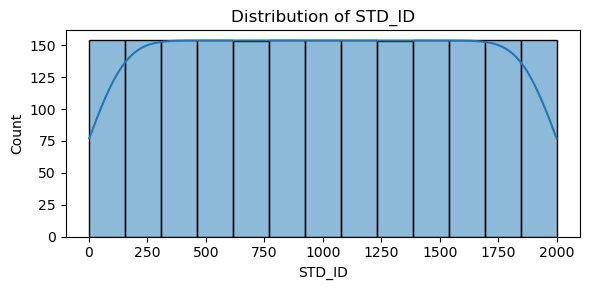

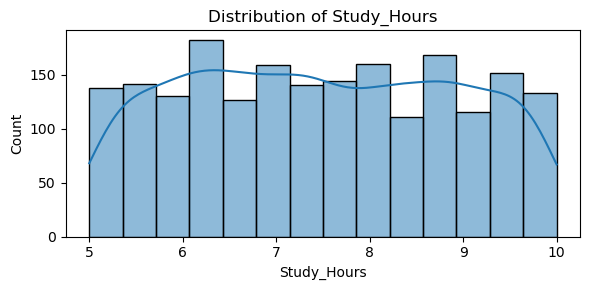

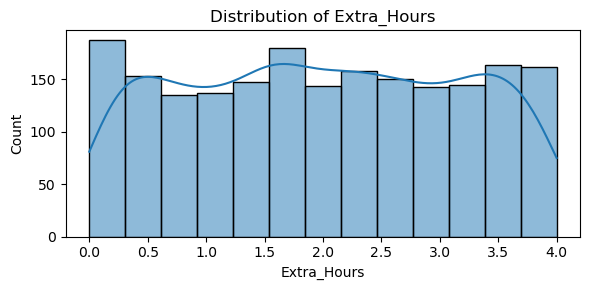

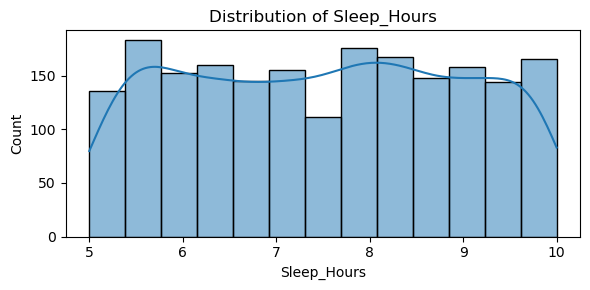

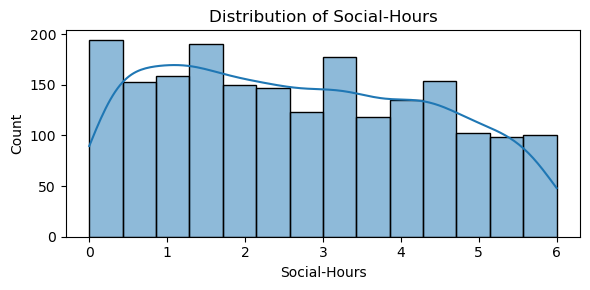

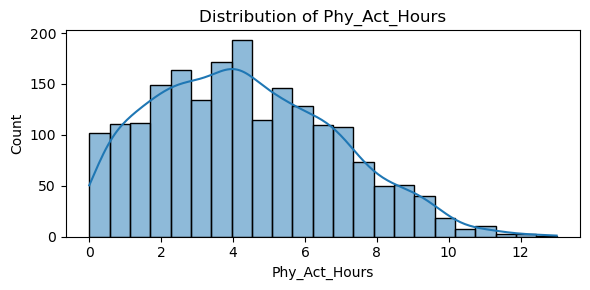

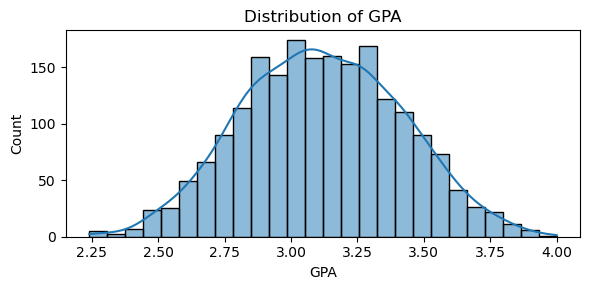

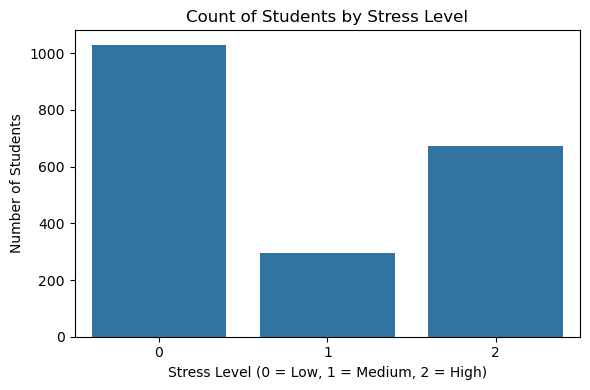


 Bevariate Analysis Start From Here!


 Bivariate Analysis vs Target: Stress_Level



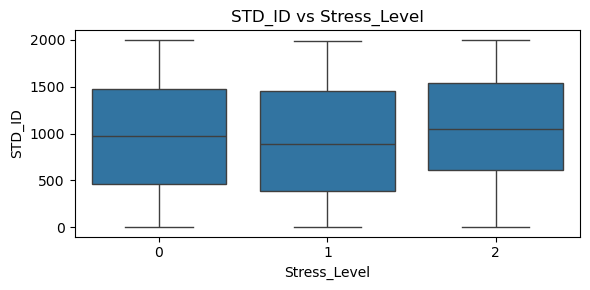

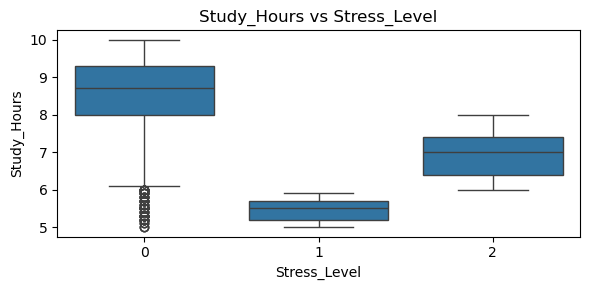

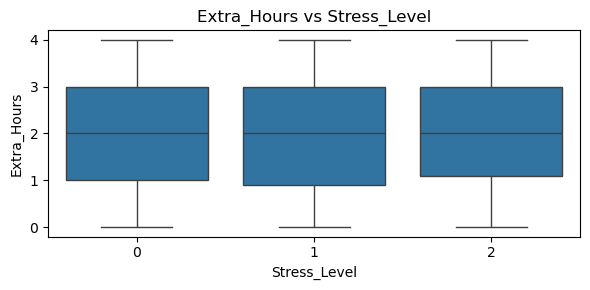

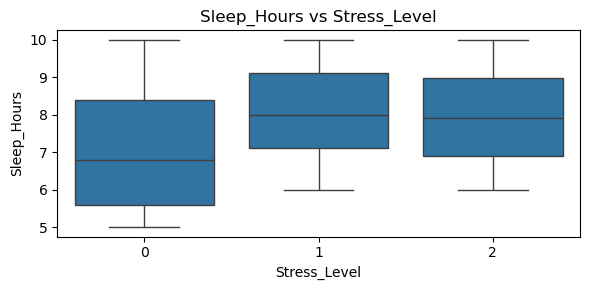

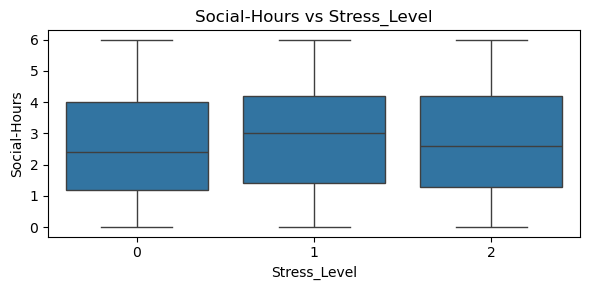

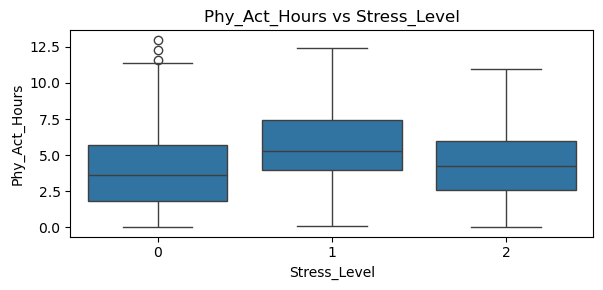

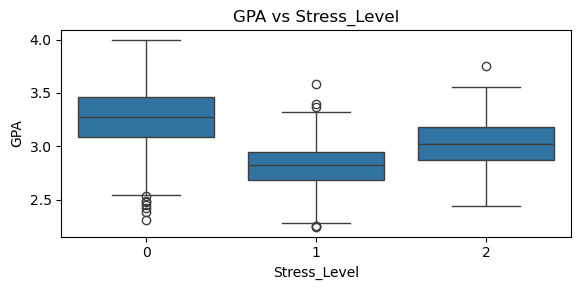

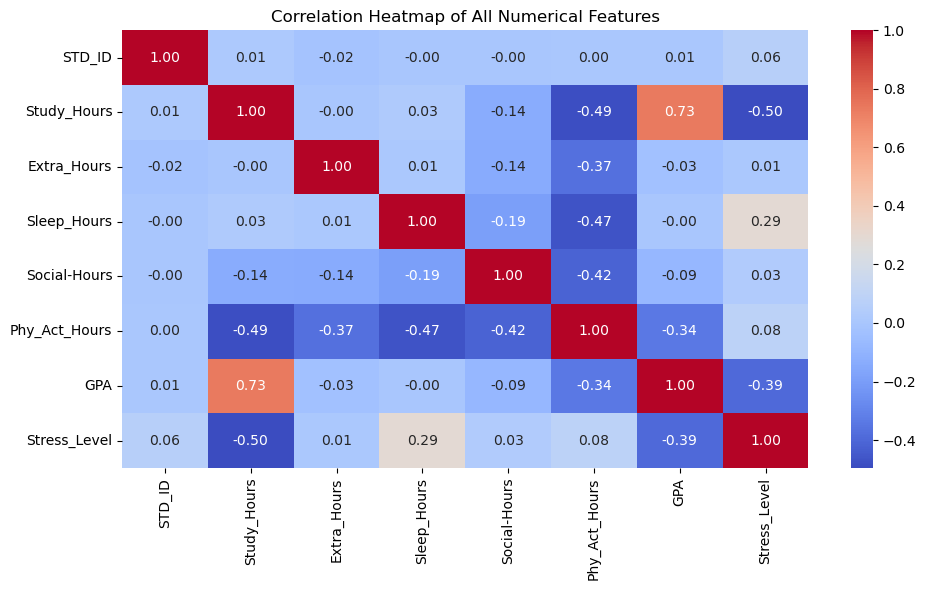

In [23]:
# Base class
class BaseAnalyzer:
    """
    Base class to hold common attributes and methods for analysis.
    """
    def __init__(self, df):
        self.df = df
class Univar_Analyzer(BaseAnalyzer):
    """
    Handles univariate visualizations for numeric and categorical features.
    """
    def plot_numerical(self):
        print("\n Univariate Analysis: Numerical Columns\n")
        num_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        for col in num_cols:
            plt.figure(figsize=(6, 3))
            sns.histplot(self.df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.tight_layout()
            plt.show()

    def plot_categorical(self):
        print("\n Univariate Analysis: Categorical Columns\n")
        cat_cols = self.df.select_dtypes(include=['object', 'category']).columns
        for col in cat_cols:
            plt.figure(figsize=(6, 3))
            sns.countplot(x=self.df[col])
            plt.title(f'Frequency of {col}')
            plt.tight_layout()
            plt.show()
class Bivar_Analyzer(BaseAnalyzer):
    """
    Handles bivariate visualizations with respect to the target variable.
    """
    def __init__(self, df, target):
        super().__init__(df)  # Call parent class constructor
        self.target = target

    def plot_bivariate(self):
        print(f"\n Bivariate Analysis vs Target: {self.target}\n")
        features = self.df.select_dtypes(include=['float64', 'int64']).columns
        for col in features:
            if col != self.target:
                plt.figure(figsize=(6, 3))
                sns.boxplot(x=self.df[self.target], y=self.df[col])
                plt.title(f'{col} vs {self.target}')
                plt.tight_layout()
                plt.show()
# Assuming df is already available

print("\n Univariate Analysis Start From Here!\n")

uni = Univar_Analyzer(df)
uni.plot_numerical()

plt.figure(figsize=(6, 4))
sns.countplot(x='Stress_Level', data=df)
plt.title("Count of Students by Stress Level")
plt.xlabel("Stress Level (0 = Low, 1 = Medium, 2 = High)")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

print("\n Bevariate Analysis Start From Here!\n")

bi = Bivar_Analyzer(df, target='Stress_Level')
bi.plot_bivariate()


#  Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Numerical Features")
plt.tight_layout()
plt.show()


# ***Modal Class***

In [24]:
# Step 1: Load example data
X, y = datasets.load_iris(return_X_y=True)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:",X_train.shape, y_train.shape)
print("Test shape:",X_test.shape, y_test.shape)

# Step 3: Train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("\nModel Train Successfully!\n")
y_pre = svm_model.predict(X_test)
print("Sample predictions:", y_pre[:5])

# Now your ModelStorage class will work:

class ModelStorage:
    def __init__(self, model):
        self.model = model

    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("\nModel saved to", filename)

    def load_model(self, filename):
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        print("\nModel loaded from", filename)
        return self.model


# 🔹 Predict on train and test
train_preds = svm_model.predict(X_train)
test_preds = svm_model.predict(X_test)

# 🔹 Accuracy
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"\nTrain Accuracy: {train_acc * 100:.2f}%")
print(f"\nTest Accuracy:  {test_acc * 100:.2f}%")

# 🔹 Cross-validation score
scores = cross_val_score(svm_model, X, y, cv=5)
print("\nCross-validation scores:", scores)
print("\nAverage Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))

# Save and load model
storage = ModelStorage(svm_model)
storage.save_model('svm_stress_model.pkl')

# Later or in another script
loaded_model = storage.load_model('svm_stress_model.pkl')
#####3##

# 🔍 Compare Predicted vs Actual Stress Level for first 5 test rows
print("\nPredicted Stress Levels:", svm_model.predict(X_test[:5]))
print("\nActual Stress Levels:   ", y_test[:5])

# Optional: show the input data for these predictions
print("\nFeature values for first 5 test samples:")
print(X_test[:5])


Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)

Model Train Successfully!

Sample predictions: [1 0 2 1 1]

Train Accuracy: 97.50%

Test Accuracy:  100.00%

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]

Average Cross-Validation Accuracy: 96.67%

Model saved to svm_stress_model.pkl

Model loaded from svm_stress_model.pkl

Predicted Stress Levels: [1 0 2 1 1]

Actual Stress Levels:    [1 0 2 1 1]

Feature values for first 5 test samples:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]


# ***Data Vulization***

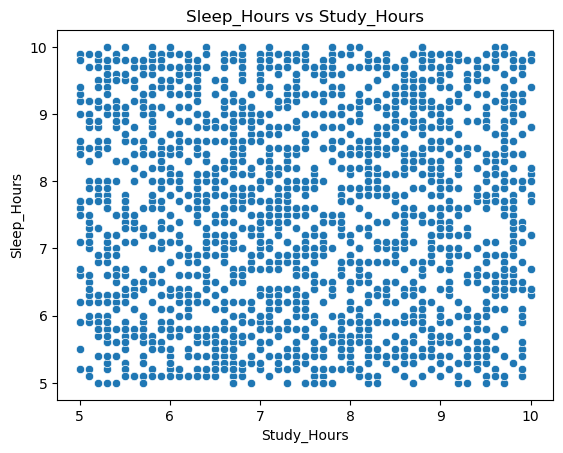

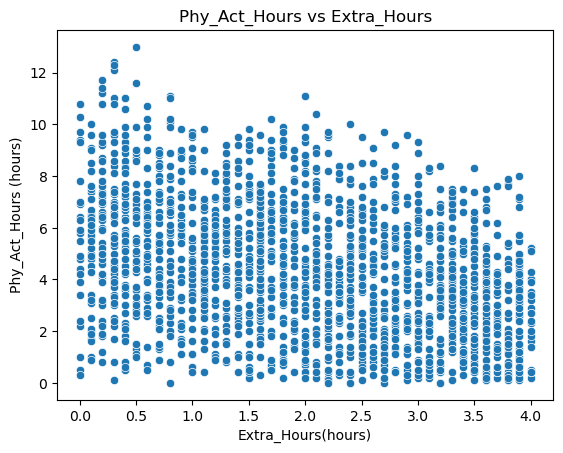

In [25]:
class data_vulizeing:
    def __init__(self, df):
        self.df = df
        
    def sleep_vs_study(self):
     sns.scatterplot(data=df, x="Study_Hours", y="Sleep_Hours")
     plt.title("Sleep_Hours vs Study_Hours")
     plt.xlabel("Study_Hours")
     plt.ylabel("Sleep_Hours")
     plt.show()
    
    def physical_vs_extracurricular(self):
     sns.scatterplot(data=df, x="Extra_Hours", y="Phy_Act_Hours")
     plt.title("Phy_Act_Hours vs Extra_Hours")
     plt.xlabel("Extra_Hours(hours)")
     plt.ylabel("Phy_Act_Hours (hours)")
     plt.show()

gr = data_vulizeing(df)
gr.sleep_vs_study()
gr.physical_vs_extracurricular()

